In [117]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
from pandas.plotting import table 

In [2]:
dfA = pd.read_csv("latest_RAPTOR_by_player.csv")
# dfA = pd.read_csv("historical_RAPTOR_by_player.csv")

In [3]:
dfA.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2021,1445,683,-4.058627,2.335879,-1.722748,-4.301808,-1.753376,...,-4.329564,1.589215,-2.740349,0.003377,0.003377,0,-4.172990,1.104970,-3.068020,0.402709
1,Jaylen Adams,adamsja01,2021,41,18,-12.439832,-3.358292,-15.798124,-26.114582,6.958711,...,-16.172564,-1.521886,-17.694450,-0.134765,-0.134765,0,-11.842060,-4.196446,-16.038506,-1.822393
2,Steven Adams,adamsst01,2021,3232,1568,-1.293095,1.859253,0.566158,3.072989,-3.385413,...,-0.484400,0.916653,0.432253,2.515640,2.515640,0,-0.506443,1.253120,0.746676,-1.194633
3,Bam Adebayo,adebaba01,2021,3752,1845,-0.100922,1.821378,1.720456,0.743567,1.591338,...,0.121733,1.860873,1.982606,4.447784,4.447784,0,-0.097356,1.370062,1.272706,-0.160984
4,LaMarcus Aldridge,aldrila01,2021,1403,674,-2.774469,-0.768277,-3.542746,-0.803965,-2.521195,...,-2.533112,-1.173940,-3.707052,-0.319307,-0.319307,0,-2.631925,-0.701502,-3.333427,-0.438595


In [4]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [5]:
dfTemp = dfA[(dfA['season'] >= 2020) & (dfA['season'] <= 2021) & (dfA['mp'] >= 0)]

In [6]:
print(dfA.loc[dfTemp["player_name"] == 'LeBron James'])

      player_name  player_id  season  poss    mp  raptor_box_offense  \
247  LeBron James  jamesle01    2021  2892  1388            5.269418   

     raptor_box_defense  raptor_box_total  raptor_onoff_offense  \
247           -0.073109          5.196309              5.267555   

     raptor_onoff_defense  ...  raptor_offense  raptor_defense  raptor_total  \
247              2.349731  ...        5.605674        0.382967       5.98864   

     war_total  war_reg_season  war_playoffs  predator_offense  \
247   6.186584        6.186584             0          4.968934   

     predator_defense  predator_total  pace_impact  
247          0.553255        5.522189    -0.028541  

[1 rows x 21 columns]


In [171]:
def k_func(col1, col2,numclusters,start_year,end_year,min_played=0,names=None,hue=False):
    tmp = names
    if tmp == None:
        dfTemp = dfA[(dfA['season'] >= start_year) & (dfA['season'] <= end_year) & (dfA['mp'] >= min_played)]
    else:
        dfTemp = dfA[(dfA['season'] >= start_year) & (dfA['season'] <= end_year) & (dfA['mp'] >= min_played) & (dfA['player_name'].isin(tmp) )]
    X = np.array(dfTemp[[col1,col2]])
    #Initialize
    K = numclusters
    #however...
    x1_coords = [x[0] for x in X]
    centroids = np.empty([K,2])
    for i in range(K):
        centroids[i] = X[random.randint(0,len(X))]
    # centroids = np.random.choice(X[0], K, replace=False)
    dists = [0]*K
    clusters = np.array([-1]*len(X))

    for _ in range(100): #100 steps is fine; or a tolerance/change check.
        #update classifications
        for j in range(len(X)):
            dists = [dist(X[j], cent) for cent in centroids]
            assignment = dists.index(min(dists))
            clusters[j] = assignment
        #update centroids
        for j in range(K):
            centroids[j]=[np.sum(X[clusters==j,0])/len(X[clusters==j,0]),np.sum(X[clusters==j,1])/len(X[clusters==j,1])]
    #initial cluster plot
    dfTemp['clusters'] = clusters
    fig, ax = plt.subplots(1,1, figsize=(9,9))
#     plt.scatter([x[0] for x in X], [x[1] for x in X], c=clusters)
#     plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c='red', marker='+')
#     plt.xlabel(col1 + " - " + str(start_year) + " to " + str(end_year))
#     plt.ylabel(col2 + " - " + str(start_year) + " to " + str(end_year))
#     if name!=None:
#         row = dfA.loc[dfTemp["player_name"] == name].iloc[0]
#         plt.text(row[col1],row[col2],row["player_name"])
    
#     col1best = dfA.iloc[dfTemp[[col1]].idxmax()].iloc[0]
#     col2best = dfA.iloc[dfTemp[[col2]].idxmax()].iloc[0]
#     plt.text(col1best[col1],col1best[col2],col1best["player_name"])
#     plt.text(col2best[col1],col2best[col2],col2best["player_name"])
    
#     col1worst = dfA.iloc[dfTemp[[col1]].idxmin()].iloc[0]
#     col2worst = dfA.iloc[dfTemp[[col2]].idxmin()].iloc[0]
    
#     plt.text(col1worst[col1],col1worst[col2],col1worst["player_name"])
#     plt.text(col2worst[col1],col2worst[col2],col2worst["player_name"])
#     plt.autoscale() 
#     plt.show()
    if hue:
        sns.scatterplot(data=dfTemp, x=col1, y=col2,hue="player_name",style="clusters",palette="deep",s=150)
    else:
        sns.scatterplot(data=dfTemp, x=col1, y=col2,style="clusters",palette="deep",s=100)
    fig.savefig("output.png")
    return dfTemp
    ###END OPTIONAL

In [170]:
# k_func("raptor_offense","raptor_defense",4,2021,2021,955)

In [153]:
k_func("raptor_offense","raptor_defense",1,2014,2021,0,'LeBron James')

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [73]:
dfA = pd.read_csv("historical_RAPTOR_by_player.csv")

<ipython-input-72-13ae389ca271>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp['clusters'] = clusters


,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,clusters
6621,James Harden,hardeja01,2014,6169,3040,6.483479,-0.090145,6.393334,14.416740,12.649454,1.767286,5.806109,0.414746,6.220855,1.123658,0
6622,James Harden,hardeja01,2015,7440,3617,7.738231,-0.234725,7.503506,19.325204,16.128532,3.196672,7.132715,0.400571,7.533286,1.519191,0
6623,James Harden,hardeja01,2016,6830,3318,5.558317,-0.702623,4.855694,13.078271,12.603310,0.474960,6.106996,-0.246404,5.860592,1.437310,0
6624,James Harden,hardeja01,2017,7045,3354,7.364581,-0.250962,7.113619,17.343949,15.199102,2.144847,8.326292,-0.432956,7.893336,2.325775,0
6625,James Harden,hardeja01,2018,6466,3172,8.750965,1.316804,10.067769,20.926163,17.048015,3.878148,9.434385,1.615119,11.049504,0.331528,0
6626,James Harden,hardeja01,2019,6728,3291,9.566047,1.149234,10.715281,22.791368,20.057946,2.733422,10.893131,1.676179,12.569309,0.463845,0
6627,James Harden,hardeja01,2020,6253,2931,8.488456,1.978387,10.466843,19.842384,16.705593,3.136792,8.042809,2.728677,10.771486,-0.094582,0
8000,LeBron James,jamesle01,2014,7021,3665,6.047470,-0.866153,5.181317,15.101104,10.890705,4.210399,6.735017,-1.016708,5.718309,0.595966,0
8001,LeBron James,jamesle01,2015,6494,3337,4.844198,0.166578,5.010777,13.312947,10.085468,3.227479,5.996404,-0.461318,5.535087,0.024679,0
8002,LeBron James,jamesle01,2016,6903,3531,5.950622,2.204911,8.155533,19.870129,14.182848,5.687281,6.752874,1.562957,8.315832,0.179268,0


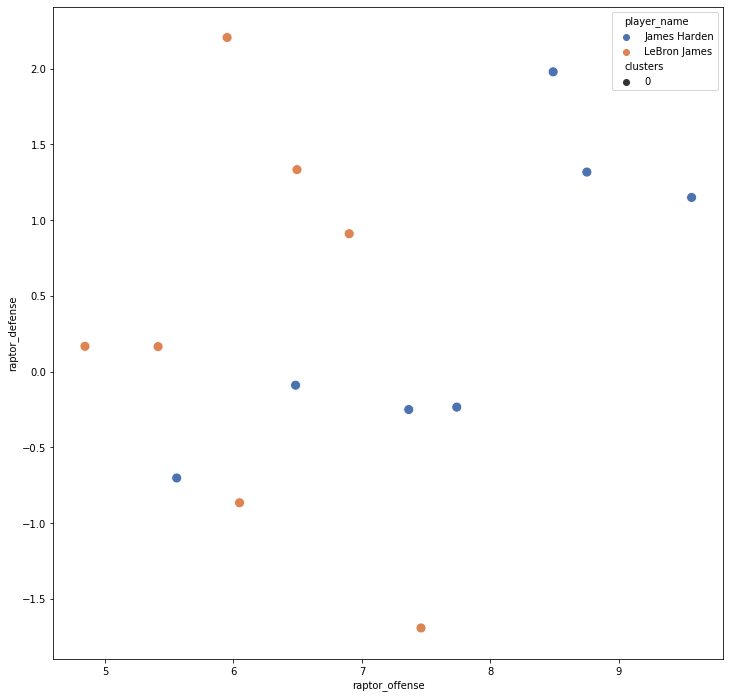

In [166]:
k_func("raptor_offense","raptor_defense",1,2014,2021,0,['LeBron James','James Harden'],1)

<ipython-input-171-bd3909f8ef61>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp['clusters'] = clusters


,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,clusters
3709,Stephen Curry,curryst01,2015,7192,3439,8.600890,2.437371,11.038262,25.089873,19.914785,5.175088,8.787715,2.657047,11.444762,3.130309,1
3710,Stephen Curry,curryst01,2016,7053,3314,10.379411,2.108447,12.487858,26.666873,23.659318,3.007555,10.635103,2.712822,13.347925,3.306111,1
3711,Stephen Curry,curryst01,2017,6963,3239,9.308684,-0.095877,9.212807,20.653304,15.619612,5.033692,9.791555,0.593993,10.385548,3.581550,1
3712,Stephen Curry,curryst01,2018,4708,2186,8.057850,-0.500107,7.557743,11.847307,8.773362,3.073945,8.209618,0.385209,8.594826,2.223310,1
3713,Stephen Curry,curryst01,2019,6820,3177,7.509478,0.277038,7.786516,17.566129,13.263794,4.302335,8.072135,0.634773,8.706908,2.223997,1
3714,Stephen Curry,curryst01,2020,317,139,6.403426,-1.457446,4.945980,0.557404,0.557404,0.000000,5.569435,-1.556775,4.012660,2.174185,1
4189,DeMar DeRozan,derozde01,2015,4415,2259,0.132974,-1.505872,-1.372899,1.584063,1.482175,0.101889,0.809560,-1.802534,-0.992975,-0.389197,0
4190,DeMar DeRozan,derozde01,2016,6934,3550,1.829736,-3.143568,-1.313832,2.523234,3.285082,-0.761848,1.359927,-2.798968,-1.439041,-0.236678,0
4191,DeMar DeRozan,derozde01,2017,5986,2993,2.101773,-1.921425,0.180348,4.455534,4.275640,0.179893,1.501123,-2.066467,-0.565344,-0.295561,0
4192,DeMar DeRozan,derozde01,2018,6336,3065,3.436637,-2.129784,1.306853,6.305072,7.007218,-0.702146,3.252800,-1.918067,1.334733,0.509793,0


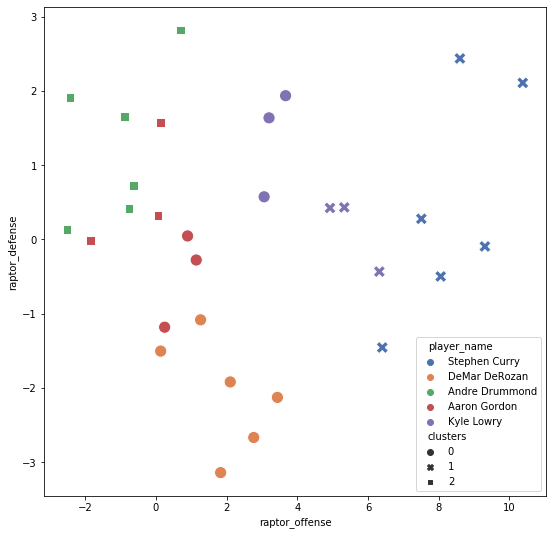

In [207]:
k_func("raptor_offense","raptor_defense",3,2015,2021,0,['Stephen Curry','Kyle Lowry','Aaron Gordon','DeMar DeRozan','Andre Drummond'],1)

<ipython-input-171-bd3909f8ef61>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp['clusters'] = clusters


,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,clusters
3709,Stephen Curry,curryst01,2015,7192,3439,8.600890,2.437371,11.038262,25.089873,19.914785,5.175088,8.787715,2.657047,11.444762,3.130309,1
3710,Stephen Curry,curryst01,2016,7053,3314,10.379411,2.108447,12.487858,26.666873,23.659318,3.007555,10.635103,2.712822,13.347925,3.306111,1
3711,Stephen Curry,curryst01,2017,6963,3239,9.308684,-0.095877,9.212807,20.653304,15.619612,5.033692,9.791555,0.593993,10.385548,3.581550,1
3712,Stephen Curry,curryst01,2018,4708,2186,8.057850,-0.500107,7.557743,11.847307,8.773362,3.073945,8.209618,0.385209,8.594826,2.223310,0
3713,Stephen Curry,curryst01,2019,6820,3177,7.509478,0.277038,7.786516,17.566129,13.263794,4.302335,8.072135,0.634773,8.706908,2.223997,0
3714,Stephen Curry,curryst01,2020,317,139,6.403426,-1.457446,4.945980,0.557404,0.557404,0.000000,5.569435,-1.556775,4.012660,2.174185,2
4189,DeMar DeRozan,derozde01,2015,4415,2259,0.132974,-1.505872,-1.372899,1.584063,1.482175,0.101889,0.809560,-1.802534,-0.992975,-0.389197,2
4190,DeMar DeRozan,derozde01,2016,6934,3550,1.829736,-3.143568,-1.313832,2.523234,3.285082,-0.761848,1.359927,-2.798968,-1.439041,-0.236678,2
4191,DeMar DeRozan,derozde01,2017,5986,2993,2.101773,-1.921425,0.180348,4.455534,4.275640,0.179893,1.501123,-2.066467,-0.565344,-0.295561,2
4192,DeMar DeRozan,derozde01,2018,6336,3065,3.436637,-2.129784,1.306853,6.305072,7.007218,-0.702146,3.252800,-1.918067,1.334733,0.509793,0


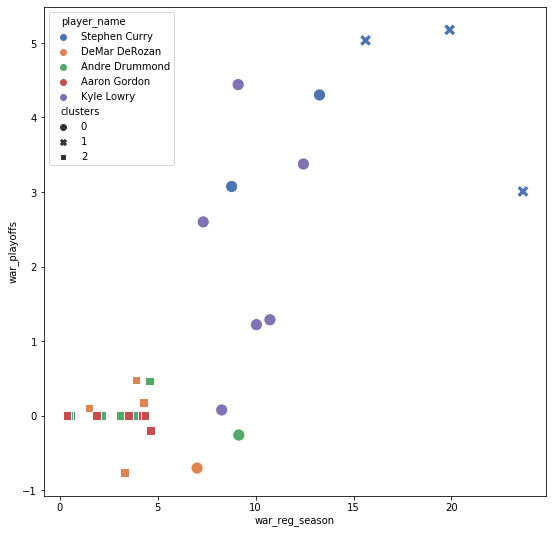

In [173]:
k_func("war_reg_season","war_playoffs",3,2015,2021,0,['Stephen Curry','Kyle Lowry','Aaron Gordon','DeMar DeRozan','Andre Drummond'],1)

<ipython-input-171-bd3909f8ef61>:27: RuntimeWarning: invalid value encountered in double_scalars
  centroids[j]=[np.sum(X[clusters==j,0])/len(X[clusters==j,0]),np.sum(X[clusters==j,1])/len(X[clusters==j,1])]
<ipython-input-171-bd3909f8ef61>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp['clusters'] = clusters


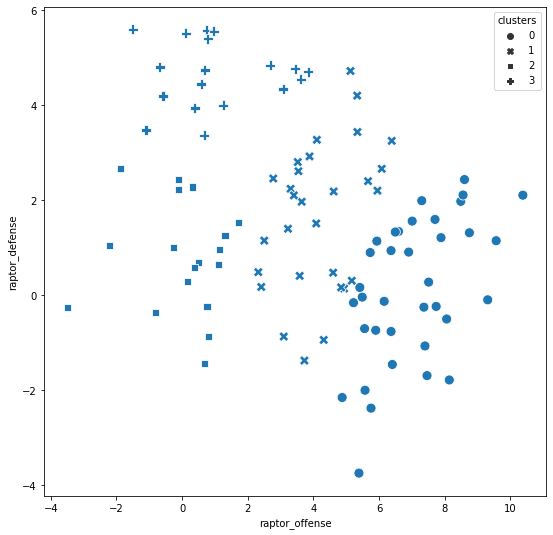

In [187]:
top20 = ['LeBron James','Kevin Durant','Giannis Antetokounmpo','Anthony Davis','Stephen Curry','Kawhi Leonard','Damian Lillard',
         'Luka Doncic','Nikola Jokic','James Harden','Jimmy Butler','Jayson Tatum','Paul George','Chris Paul','Joel Embiid','Ben Simmons','Rudy Gobert','Bam Adebayo','Pascal Siakam','Bradley Beal']
tst = k_func("raptor_offense","raptor_defense",5,2015,2021,0,top20,False)

In [196]:
dict = {}
for name in top20:
    dict[name] = [0]*5

In [197]:
dict

{'LeBron James': [0, 0, 0, 0, 0],
 'Kevin Durant': [0, 0, 0, 0, 0],
 'Giannis Antetokounmpo': [0, 0, 0, 0, 0],
 'Anthony Davis': [0, 0, 0, 0, 0],
 'Stephen Curry': [0, 0, 0, 0, 0],
 'Kawhi Leonard': [0, 0, 0, 0, 0],
 'Damian Lillard': [0, 0, 0, 0, 0],
 'Luka Doncic': [0, 0, 0, 0, 0],
 'Nikola Jokic': [0, 0, 0, 0, 0],
 'James Harden': [0, 0, 0, 0, 0],
 'Jimmy Butler': [0, 0, 0, 0, 0],
 'Jayson Tatum': [0, 0, 0, 0, 0],
 'Paul George': [0, 0, 0, 0, 0],
 'Chris Paul': [0, 0, 0, 0, 0],
 'Joel Embiid': [0, 0, 0, 0, 0],
 'Ben Simmons': [0, 0, 0, 0, 0],
 'Rudy Gobert': [0, 0, 0, 0, 0],
 'Bam Adebayo': [0, 0, 0, 0, 0],
 'Pascal Siakam': [0, 0, 0, 0, 0],
 'Bradley Beal': [0, 0, 0, 0, 0]}

In [198]:
for index, row in tst.iterrows():
    cluster = row['clusters']
    dict[row['player_name']][cluster] += 1

In [199]:
dominance = []
for name,clusters in dict.items():
    score = str(round((clusters[1]+clusters[3])/sum(clusters)*100,2))+'%'
    dominance.append([name, score])

In [200]:
dict

{'LeBron James': [4, 2, 0, 0, 0],
 'Kevin Durant': [5, 0, 0, 0, 0],
 'Giannis Antetokounmpo': [0, 4, 2, 0, 0],
 'Anthony Davis': [0, 1, 1, 4, 0],
 'Stephen Curry': [6, 0, 0, 0, 0],
 'Kawhi Leonard': [2, 2, 0, 2, 0],
 'Damian Lillard': [5, 1, 0, 0, 0],
 'Luka Doncic': [1, 1, 0, 0, 0],
 'Nikola Jokic': [1, 3, 0, 1, 0],
 'James Harden': [6, 0, 0, 0, 0],
 'Jimmy Butler': [0, 6, 0, 0, 0],
 'Jayson Tatum': [0, 1, 2, 0, 0],
 'Paul George': [0, 4, 1, 1, 0],
 'Chris Paul': [5, 1, 0, 0, 0],
 'Joel Embiid': [0, 0, 0, 4, 0],
 'Ben Simmons': [0, 0, 3, 0, 0],
 'Rudy Gobert': [0, 0, 0, 6, 0],
 'Bam Adebayo': [0, 0, 3, 0, 0],
 'Pascal Siakam': [0, 0, 4, 0, 0],
 'Bradley Beal': [1, 3, 2, 0, 0]}

In [201]:
df = pd.DataFrame(dominance,columns=['player','score'])

In [202]:
df.index.name = 'rank'

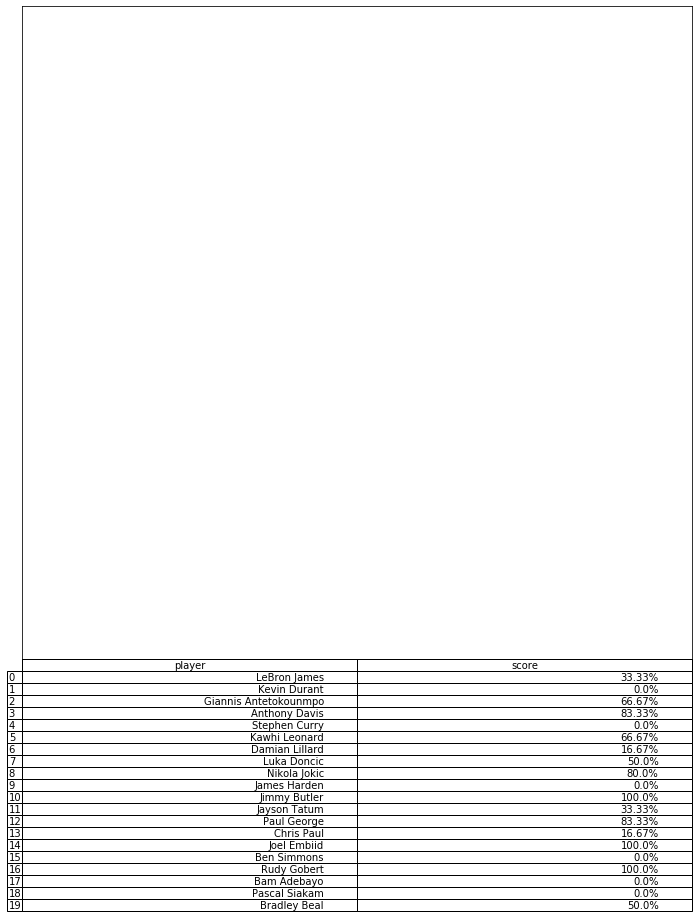

In [203]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)  # where df is your data frame

plt.savefig('mytable.png')

In [110]:
df_styled = df.style.background_gradient()

In [112]:
dfi.export(df,"mytable.png")

OSError: Chrome executable not able to be found on your machine

[1 3 3 2 1 1 1 3 1 1 1 2 1 4 1 1 0 3 2 2 2 2 0 1 2 2 1 2 0 3 0 2 1 2 1 3 1
 1 1 1 1 3 3 1 1 1 3 3 3 2 1 1 1 1 2 3 2 1 0 2 2 1 1 1 3 1 1 1 2 2 2 1 3 1
 1 2 2 2 1 1 2 0 4 1 1 2 1 3 1 2 2 0 1 3 2 1 1 1 1 1 2 2 1 3 1 1 1 1 2 1 2
 2 1 1 3 0 1 1 2 0 2 1 1 4 1 2 1 2 3 1 1 2 3 3 4 2 1 0 1 2 2 1 3 0 1 1 3 1
 1 0 1 1 3 0 0 1 1 3 0 3 2 1 0 1 1 1 1 3 2 0 2 2 3 1 0 3 4 1 2 0 3 1 1 1 1
 3 2 1 1 1 1 0 1 0 1 1 1 3 4 1 1 3 2 2 2 3 1 2 1 1 3 2 1 1 1 1 1 0 2 3 1 1
 3 4 3 2 2 1 3 1 2 2 1 1 0 1 2 1 2 3 3 2 3 1 0 1 2 0 2 1 4 1 1 1 1 1 2 1 1
 1 0 4 0 3 2 2 2 1 1 2 1 1 1 1 2 0 0 1 2 0 2 1 1 1 2 1 2 1 1 1 1 1 2 2 4 1
 2 4 1 1 3 1 2 4 2 1 1 1 1 2 1 1 2 1 1 2 1 0 1 1 3 1 0 3 2 1 2 2 0 0 2 2 1
 1 2 1 3 1 1 1 2 3 1 3 1 1 0 1 1 2 1 0 3 2 1 0 1 2 3 1 1 2 1 2 2 2 1 1 1 2
 1 1 1 2 1 2 1 1 0 1 1 1 2 3 1 1 2 2 1 1 2 1 0 1 1 1 4 1 2 1 0 1 1 3 1 1 0
 0 2 1 1 3 2 2 1 1 2 1 1 2 1 2 1 1 3 0 1 1 3 1 0 2 2 1 3 2 3 1 1 2 2 0 3 2
 1 0 1 1 1 3 1 3 0 1 3 0 1 1 1 1 0 1 1 0 4 1 2 3 0 1 0 1 2 1 2 1 1 3 2 0 3
 1 1 2 1 3 2 1 3 1 1 3 1 

<ipython-input-119-de9e04e5d4db>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp['clusters'] = clusters


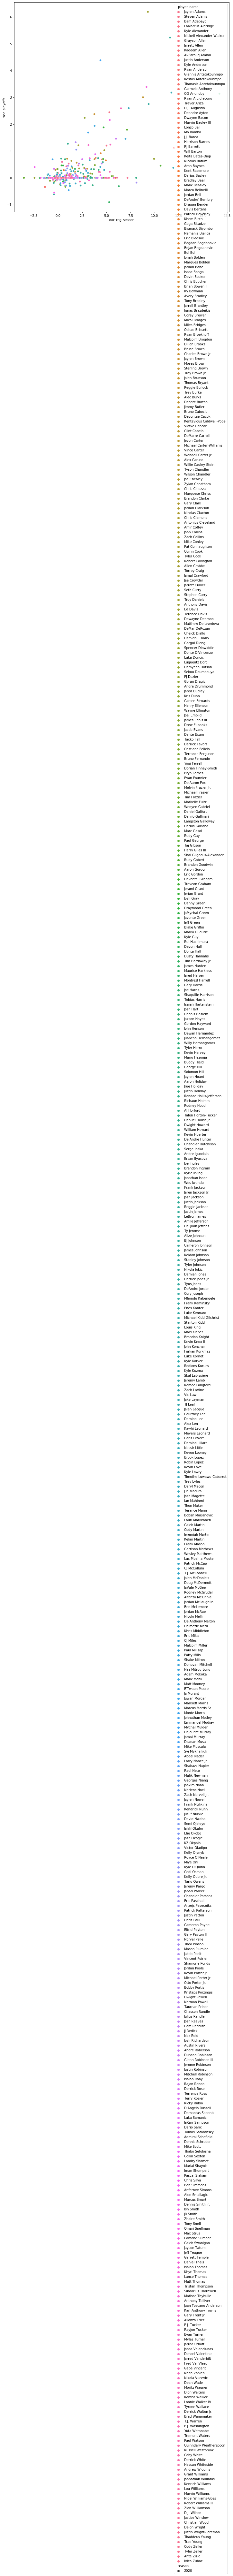

In [132]:
k_func("war_reg_season","war_playoffs",5,2020,2020,0)

[1 1 1 ... 1 3 0]


<ipython-input-43-e5ead666be28>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTemp['clusters'] = clusters


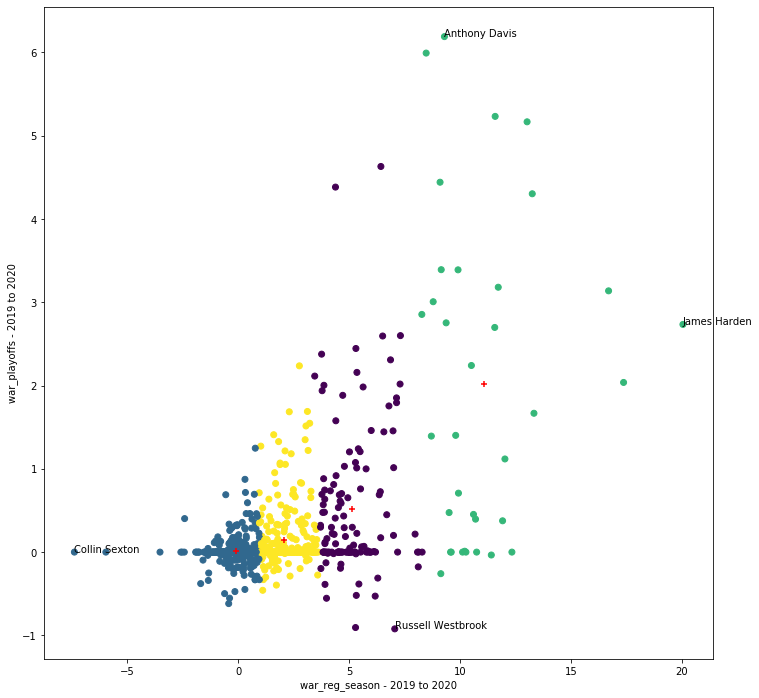

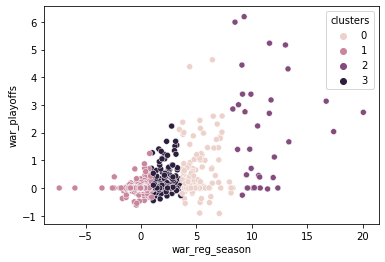

In [51]:
k_func("war_reg_season","war_playoffs",4,2019,2020)

In [ ]:
k_func("raptor_offense","raptor_defense",4,2020,2020)

In [ ]:
k_func("raptor_total","war_reg_season",4,2020,2020)